In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import plot
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import os

# to make this notebook's output stable across runs
np.random.seed(42)# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
#Retrieve and load the mnist_784 dataset of 70,000 instances
mnist_data = fetch_openml('mnist_784', version = 1)

In [3]:
# Listing the keys
print("Keys in MNIST Dataset:\n", mnist_data.keys())

Keys in MNIST Dataset:
 dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [4]:
X = mnist_data['data'].to_numpy()
Y = mnist_data['target'].to_numpy()

In [5]:
print("Shape of data and target respectively are:\n", X.shape, " and ", Y.shape)

Shape of data and target respectively are:
 (70000, 784)  and  (70000,)


In [6]:
# printing digits
#Defining a function to plot a group of images 10 per row
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")


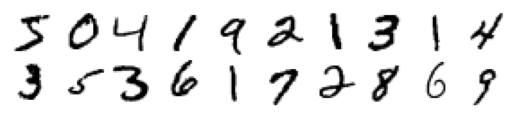

In [7]:
# Calling the function to print the first 20 images
plt.figure(figsize=(9,9))
example_images = X[:20]
plot_digits(example_images, images_per_row=10)
plt.show()

In [8]:
#Use PCA to retrieve the 1 and 2nd principal component and output their explained variance ratio
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [9]:
print("Shape of PCA is -: ", X_pca.shape)
print("Variance Ratio is -: ", pca.explained_variance_ratio_)

Shape of PCA is -:  (70000, 2)
Variance Ratio is -:  [0.09746116 0.07155445]


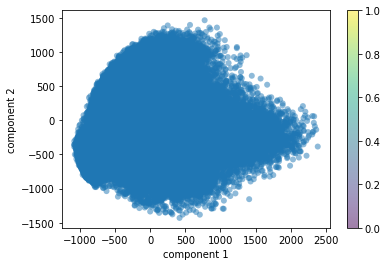

In [10]:
#Plot the projections of the 1th and 2nd principal component onto a 1D hyperplane.
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [11]:
fig_proj = px.scatter(x = X_pca[:, 0], y = X_pca[:, 1])

plot(fig_proj)

save_fig("temp-plot")

Saving figure temp-plot


<Figure size 432x288 with 0 Axes>

In [12]:
#Use Incremental PCA to reduce the dimensionality of the MNIST dataset down to 154 dimensions.
inc_pca = IncrementalPCA(n_components=154)
X_incpca = inc_pca.fit_transform(X)

print("Shape of INC PCA is -: ", X_incpca.shape)
print("Variance Ratio is -: ", inc_pca.explained_variance_ratio_)

Shape of INC PCA is -:  (70000, 154)
Variance Ratio is -:  [0.09746116 0.07155444 0.0614953  0.05403384 0.04888933 0.04305226
 0.0327826  0.0288964  0.02758363 0.02342138 0.02106686 0.02037551
 0.01707061 0.01694017 0.01583379 0.01486342 0.01319355 0.0127901
 0.01187268 0.01152932 0.01066035 0.01009789 0.00959146 0.0090963
 0.0088328  0.00838812 0.00809826 0.0078571  0.00740255 0.00690007
 0.00656136 0.00645462 0.00600811 0.00585603 0.00566743 0.00543461
 0.00504707 0.00487067 0.00478944 0.00467582 0.00454357 0.00444904
 0.00418205 0.00396148 0.00383689 0.00375768 0.00361412 0.00349008
 0.00338715 0.00319679 0.00316839 0.00310126 0.0029646  0.00287083
 0.00282491 0.00269403 0.00268367 0.00256487 0.00253147 0.00244623
 0.00239677 0.00238558 0.00229206 0.00220917 0.00213034 0.00206285
 0.0020275  0.00194998 0.00191434 0.00188512 0.00186935 0.00180064
 0.0017675  0.00173321 0.00164814 0.00163198 0.00161371 0.0015426
 0.0014697  0.00142134 0.00140975 0.00140097 0.00139551 0.00134967
 0.001

In [13]:
print("Variance explained by all the components: ", 
      sum(inc_pca.explained_variance_ratio_ * 100))

Variance explained by all the components:  95.00165146603136


In [14]:
X_recovered = inc_pca.inverse_transform(X_incpca)

In [15]:
# EXTRA
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = plt.cm.binary, **options)
    plt.axis("off")

Saving figure mnist_compression_plot


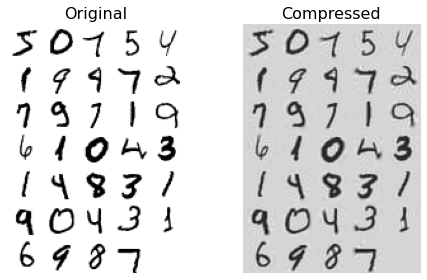

In [16]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

save_fig("mnist_compression_plot")